In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [82]:
def read_and_preprocess(file_name, columns_to_drop, crucial_na_columns):
    df = pd.read_csv(file_name)
    df.dropna(subset = crucial_na_columns, inplace=True)
    df = df.drop(columns=columns_to_drop)
    return df

def extract_country_row(df, country_name):
    df.loc[df['Country Name'] == country_name] = df.loc[df['Country Name'] == country_name].fillna(0)
    return df.loc[df['Country Name'] == country_name]

def plot_country_data(df, country_name, plot_line, plot_connections, starting_year, ending_year, removed_years, title, xlabel, ylabel, increment, filename):  
    y = np.array(extract_country_row(df, country_name).iloc[:, -(ending_year-starting_year+1):]).flatten()
    for i in range(len(y)):
        if y[i] != 0:
            break
    
    print(i)
    
    starting_year += i
    y = y[i:]
    x = np.array(range(starting_year, ending_year + 1))
    values_to_remove_from_x = []
    values_to_remove_from_y = []
    for i in range(len(x)):
        for j in range(len(removed_years)):
            if x[i] == removed_years[j]:
                values_to_remove_from_x.append(x[i])
                values_to_remove_from_y.append(y[i])
    x = [ele for ele in x if ele not in values_to_remove_from_x]
    y = [ele for ele in y if ele not in values_to_remove_from_y]

    
    
    
    m, b = np.polyfit(x, y, 1)
    if (plot_connections):
        plt.scatter(x, y)
        plt.plot(x, y)
    else:
        plt.plot(x, y, 'o')
    if plot_line:
        plt.plot(x, m*x + b)
        print(m)
        print(b)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(range(starting_year, ending_year + 1, increment))
    
    plt.savefig(filename, bbox_inches='tight')
    
def find_country_to_minimize_column(df, column_name, exclude):
    for row in exclude:
        df = df.loc[df["Country Name"] != row]
    return df[df[column_name] == df[column_name].min()]["Country Name"]
def find_country_to_maximize_column(df, column_name, exclude):
    for row in exclude:
        df = df.loc[df["Country Name"] != row]
    return df[df[column_name] == df[column_name].max()]["Country Name"]

def iterate_rows(df):
    # This function will almost always need further implementation
    for index, row in df.iterrows():
        print(row)
        
def find_fastest_declining_region(df, first_year, second_year):
    lowestM = 10000000
    lowestCountry = ""
    # This function will almost always need further implementation
    for index, row in df.iterrows():
        y = np.array([row[first_year], row[second_year]])
        x = np.array([int(first_year), int(second_year)])
        m, b = np.polyfit(x, y, 1)
        if m < 0:
            if m < lowestM:
                lowestM = m
                lowestCountry = row["Country Name"]
            print("Declines: " + row["Country Name"] )
    return (lowestM, lowestCountry)
        
def find_fastest_growing_region(df, first_year, second_year):
    highestM = 0
    highestCountry = ""
    # This function will almost always need further implementation
    for index, row in df.iterrows():
        y = np.array([row[first_year], row[second_year]])
        x = np.array([int(first_year), int(second_year)])
        m, b = np.polyfit(x, y, 1)
        if m > 0:
            if m > highestM:
                highestM = m
                highestCountry = row["Country Name"]
            print("Inclines: " + row["Country Name"] + ": " + str(m))
    return (highestM, highestCountry)
    


In [80]:
df = read_and_preprocess("literacy_data.csv", [], ["2017", "2018"])
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
5,Arab World,ARB,"Literacy rate, youth total (% of people ages 1...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,83.18158,83.60195,84.02709,85.11303,85.82474,86.08416,86.27419,84.96331,85.34282,85.59760
18,Bangladesh,BGD,"Literacy rate, youth total (% of people ages 1...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,77.98499,77.83291,85.52715,85.55473,87.88877,92.24265,92.95076,93.29644
20,Bahrain,BHR,"Literacy rate, youth total (% of people ages 1...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,95.45447,NaN,NaN,NaN,NaN,NaN,99.48031,99.59822,99.68720
27,Brazil,BRA,"Literacy rate, youth total (% of people ages 1...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,98.06554,97.51412,98.48692,98.61966,98.73668,98.84569,98.96375,99.11096,99.15541,99.20417
59,East Asia & Pacific (excluding high income),EAP,"Literacy rate, youth total (% of people ages 1...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,98.85714,98.84143,98.42472,98.45670,98.48129,98.67295,98.72303,98.74075,98.77351,98.79981
60,Early-demographic dividend,EAR,"Literacy rate, youth total (% of people ages 1...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,87.31561,87.49763,87.72479,88.37109,89.20160,89.86197,90.50441,91.00432,91.32992,91.68122
61,East Asia & Pacific,EAS,"Literacy rate, youth total (% of people ages 1...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,98.71074,98.66465,98.25042,98.28715,98.31566,98.54467,98.59638,98.61740,98.65223,98.68101
62,Europe & Central Asia (excluding high income),ECA,"Literacy rate, youth total (% of people ages 1...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,99.34167,99.42214,99.51452,99.56386,99.61052,99.63720,99.66466,99.72012,99.72408,99.74303
63,Europe & Central Asia,ECS,"Literacy rate, youth total (% of people ages 1...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,99.41970,99.47449,99.50534,99.53741,99.56906,99.59408,99.60965,99.64151,99.65887,99.67093
72,Fragile and conflict affected situations,FCS,"Literacy rate, youth total (% of people ages 1...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,69.49227,69.87558,71.19566,71.32621,71.68883,72.00898,72.57644,72.81978,73.51974,73.92391


In [60]:
find_country_to_minimize_column(df, "2018", ["Pre-demographic dividend", "Fragile and conflict affected situations", "Heavily indebted poor countries (HIPC)", "Low income", "Sub-Saharan Africa (excluding high income)", "Sub-Saharan Africa (excluding high income)"])


215                           Sub-Saharan Africa
239    Sub-Saharan Africa (IDA & IBRD countries)
Name: Country Name, dtype: object

In [61]:
find_country_to_maximize_column(df, "2018", [])

206    Singapore
Name: Country Name, dtype: object

In [62]:
find_fastest_declining_region(df, "2017", "2018")

Declines: Kuwait
Declines: Sri Lanka
Declines: Malaysia
Declines: Oman
Declines: Peru
Declines: Singapore
Declines: El Salvador
Declines: Uruguay


(-0.42223000000001115, 'Malaysia')

0


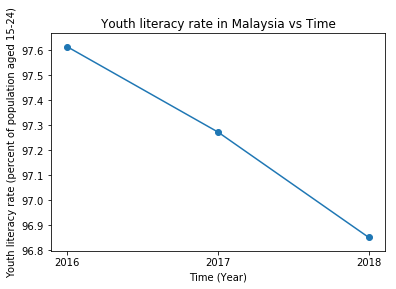

In [72]:
plot_country_data(df, "Malaysia", False, True, 2016, 2018, [], "Youth literacy rate in Malaysia vs Time", "Time (Year)", "Youth literacy rate (percent of population aged 15-24)", 1, "malasyia.png")


0


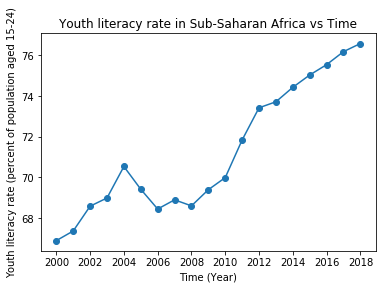

In [73]:
plot_country_data(df, "Sub-Saharan Africa", False, True, 2000, 2018, [], "Youth literacy rate in Sub-Saharan Africa vs Time", "Time (Year)", "Youth literacy rate (percent of population aged 15-24)", 2, "africa.png")


In [83]:
find_fastest_growing_region(df, "2017", "2018")

Inclines: Arab World: 0.2547800000000168
Inclines: Bangladesh: 0.3456800000000207
Inclines: Bahrain: 0.08898000000000247
Inclines: Brazil: 0.04875999999997922
Inclines: East Asia & Pacific (excluding high income): 0.026299999999999137
Inclines: Early-demographic dividend: 0.35130000000000144
Inclines: East Asia & Pacific: 0.028779999999999053
Inclines: Europe & Central Asia (excluding high income): 0.0189500000000071
Inclines: Europe & Central Asia: 0.012059999999998745
Inclines: Fragile and conflict affected situations: 0.40416999999999215
Inclines: Heavily indebted poor countries (HIPC): 0.48050000000002596
Inclines: IBRD only: 0.20413999999999646
Inclines: IDA & IBRD total: 0.19562000000000726
Inclines: IDA total: 0.4629800000000019
Inclines: IDA blend: 0.6745300000000088
Inclines: IDA only: 0.3574300000000175
Inclines: Latin America & Caribbean (excluding high income): 0.08200000000001408
Inclines: Latin America & Caribbean: 0.07688999999998675
Inclines: Least developed countries: 

(0.6896700000000239, 'Pre-demographic dividend')

0


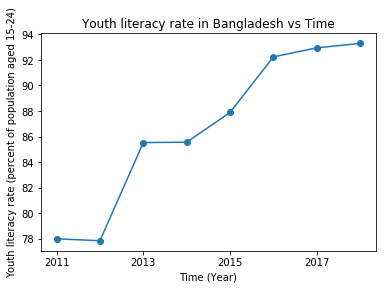

In [85]:
plot_country_data(df, "Bangladesh", False, True, 2011, 2018, [], "Youth literacy rate in Bangladesh vs Time", "Time (Year)", "Youth literacy rate (percent of population aged 15-24)", 2, "bangladesh.png")


0


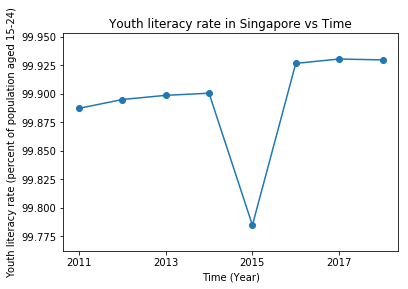

In [87]:
plot_country_data(df, "Singapore", False, True, 2011, 2018, [], "Youth literacy rate in Singapore vs Time", "Time (Year)", "Youth literacy rate (percent of population aged 15-24)", 2, "singapore.png")
